In [1]:
import pandas as pd
import numpy as np
import requests
import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
#import cpickle as pickle

#price_df = pd.read_csv("20180101_hourly_prices.csv")
price_df=pd.read_pickle("data_spread.pkl")
price_df.head(5)

,106THSO_LNODED1,118THSO_LNODER1,13THSO_LNODE-3,13THSO_LNODED2,23RDST_LNODED3,26FTDROP_GNODEIT,2C559EQ2_7_N001,3RDWEST_LNODED1,3RDWEST_LNODED2,5THWEST_LNODED1,...,WLSV_LNODEWR1,WLSV_LNODEWR2,WLSV_LNODEWR3,WNP_2_GNODE1,WPRT_LNODEWR1,WPRT_LNODEWR2,WUNI_LNODEWR1,WUNI_LNODEWR2,YMHL_LNODEBR1,YMHL_LNODEBR2
Date,,,,,,,,,,,,,,,,,,,,,
20160301,9.82555,9.82555,10.32424,9.81753,9.80323,9.71557,35.56096,9.82223,9.82223,9.81956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160302,24.08801,24.08393,26.44433,24.06762,24.05132,23.72926,32.62693,24.08393,24.08393,24.07985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160303,20.54867,20.53885,22.74389,20.55618,20.62541,20.53256,27.54345,20.57052,20.57052,20.56071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160304,20.49322,20.49322,21.80458,20.48818,20.48539,20.31557,23.35957,20.49398,20.49398,20.49398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160305,22.56454,22.56454,24.02016,22.54972,22.51486,21.21754,26.52639,22.55557,22.55557,22.55557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
price_df.head(50)

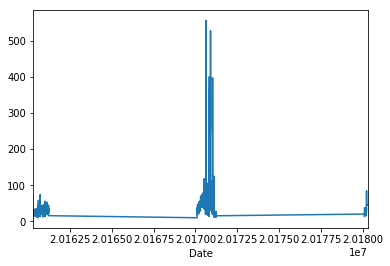

In [79]:
temp=price_df["106THSO_LNODED1"]
#temp.set_index("Timestamp",inplace=True)
#temp.head(5)
temp.plot()



In [59]:
#temp.describe()
temp.tail(100)

Date
20171125    19.28265
20171126    19.80085
20171127    27.77165
20171128    23.15839
20171129    14.56006
20171130    13.96644
20171201    13.92743
20171201    22.64315
20171202    12.91269
20171203    25.11734
20171204    23.24401
20171205    25.77113
20171206    17.91634
20171207    24.45105
20171208    22.73520
20171209    20.62394
20171210    16.06050
20171211    20.53469
20171212    18.94738
20171213    20.68610
20171214    25.80592
20171215    20.61711
20171216    19.66606
20171217    20.77601
20171218    21.30723
20171219    23.29704
20171220    23.43119
20171221    27.82189
20171222    22.32754
20171223    19.12670
              ...   
20180201    15.49189
20180201    19.45469
20180202    33.03061
20180203    34.84806
20180204    36.78403
20180205    33.57966
20180206    31.61641
20180207    32.96365
20180208    31.93986
20180209    33.30020
20180210    37.63201
20180211    34.67280
20180212    33.06977
20180213    27.04204
20180214    24.63461
20180215    24.27431
20180216

In [60]:
#window is selected as 24 owing to the data being hourly prices

rolmean = temp.rolling(window=30).mean()
rolstd = temp.rolling(window=30).std()

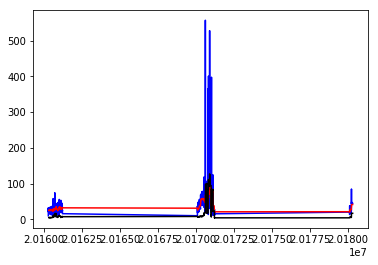

In [61]:
import matplotlib.pylab as plt

orig = plt.plot(temp,color="blue",label="Original")
mean_d = plt.plot(rolmean, color = "red", label = "Rolling Mean")
std_d = plt.plot(rolstd,color = "black", label = "Rolling Std")
plt.show()

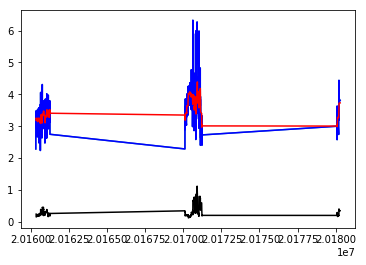

In [62]:
#Taking (or Trying the log) = Gives no significant advantage
#There is no particular trend

temp_log = np.log(temp)
plt.plot(temp_log)


rolmean_log = temp_log.rolling(window=24).mean()
rolstd_log = temp_log.rolling(window=24).std()

orig = plt.plot(temp_log,color="blue",label="Original")
mean_d = plt.plot(rolmean_log, color = "red", label = "Rolling Mean")
std_d = plt.plot(rolstd_log,color = "black", label = "Rolling Std")
plt.show()

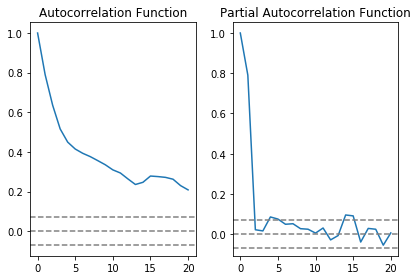

In [63]:
#finding the p and q values
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf (temp_log, nlags=20)
lag_pacf = pacf (temp_log, nlags=20, method = "ols")

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(temp_log)), linestyle='--',color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(temp_log)), linestyle='--',color = 'gray')
plt.title("Autocorrelation Function")

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(temp_log)), linestyle='--',color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(temp_log)), linestyle='--',color = 'gray')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

#We choose p as 5 and q as 2


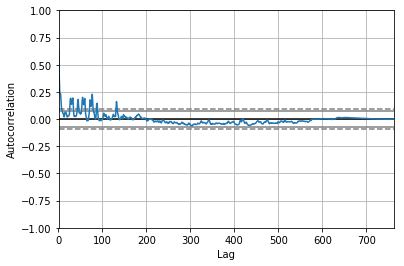

In [65]:
#Autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

autocorrelation_plot(temp)
#pyplot.show()

In [66]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(temp, order=(5,0,2))
model_fit=model.fit(disp=0)


                              ARMA Model Results                              
Dep. Variable:        106THSO_LNODED1   No. Observations:                  762
Model:                     ARMA(5, 2)   Log Likelihood               -3760.266
Method:                       css-mle   S.D. of innovations             33.629
Date:                Mon, 06 May 2019   AIC                           7538.532
Time:                        20:51:14   BIC                           7580.255
Sample:                             0   HQIC                          7554.597
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    40.5254      3.808     10.641      0.000      33.061      47.989
ar.L1.106THSO_LNODED1     0.3913      0.318      1.229      0.219      -0.233       1.015
ar.L2.10

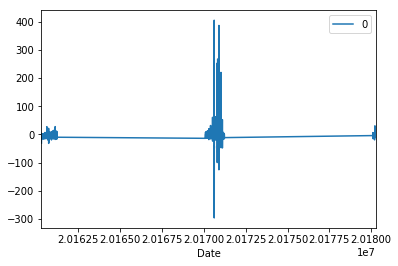

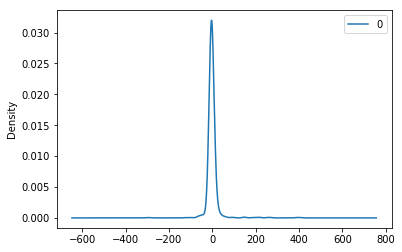

                0
count  762.000000
mean     0.036622
std     33.658953
min   -296.346957
25%     -7.810634
50%     -3.175035
75%      2.258795
max    405.325611


In [67]:
from pandas import DataFrame

print(model_fit.summary())
residuals=DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [68]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(temp, order=(5,0,2))
model_fit=model.fit(disp=0)


model_fit.predict()


Date
20160301    40.525404
20160302    21.028660
20160303    30.545651
20160304    27.244622
20160305    25.913076
20160306    27.330774
20160307    34.996062
20160308    27.035707
20160309    26.336559
20160310    27.883126
20160311    28.521672
20160312    28.812715
20160313    30.939345
20160314    29.752264
20160315    31.693840
20160316    28.396364
20160317    32.087275
20160318    32.288461
20160319    28.839522
20160320    31.087881
20160321    33.140392
20160322    34.764981
20160323    32.640579
20160324    31.930532
20160325    31.385393
20160326    26.851416
20160327    30.180142
20160328    34.800391
20160329    29.648288
20160330    32.351654
              ...    
20180201    34.827220
20180201    23.954679
20180202    26.251853
20180203    36.241344
20180204    36.436809
20180205    35.268827
20180206    34.841323
20180207    35.662098
20180208    35.773142
20180209    34.623982
20180210    35.517724
20180211    38.318680
20180212    36.329967
20180213    35.169549
20180

<h2> Incremental Predictions </h2>

In [71]:
len(price_df)
price_df_train = price_df.head(650)

In [72]:
price_df_test = price_df.tail(-650)

0.06568785974915843


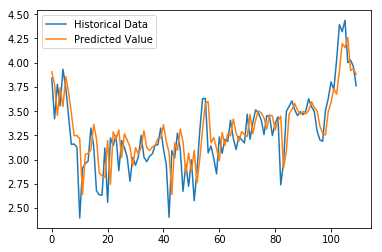

In [82]:
predictions = list()
history = list()

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

def rolling_predictions(x):
    price_df_train = x.head(650)
    price_df_test = x.tail(-650)
    for i in range(len(price_df_test)):
        if i == (len(price_df_test)-2):
            break
        model = ARIMA(x.head(650 + i),order = (1,0,2))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        predicted_value = output[0]
        predictions.append(predicted_value)
        actual_value=price_df_test.iloc[i]
        history.append(actual_value)
        #print("Predicted value {} Actual value {}".format(predicted_value,actual_value))
    error = mean_squared_error(history,predictions)
    print(error)
    plt.plot(history,label = "Historical Data")
    plt.plot(predictions,label = "Predicted Value")
    plt.legend(loc ='upper left')
    plt.show()

#temp = price_df["106THSO_LNODED1"]
#San Diego,Fresno
#temp = np.log(temp)
#len(temp)
rolling_predictions(temp_log)


In [83]:
temp_log

Date
20160301    2.284986
20160302    3.181714
20160303    3.022796
20160304    3.020094
20160305    3.116380
20160306    3.454275
20160307    3.055480
20160308    3.031199
20160309    3.037733
20160310    3.047840
20160311    3.194439
20160312    3.315833
20160313    3.215181
20160314    3.334849
20160315    3.116258
20160316    3.325862
20160317    3.355640
20160318    3.152995
20160319    3.301613
20160320    3.374507
20160321    3.475235
20160322    3.411826
20160323    3.333488
20160324    3.268265
20160325    2.958717
20160326    3.209473
20160327    3.470431
20160328    3.227950
20160329    3.404705
20160330    2.974578
              ...   
20180201    2.740317
20180201    2.968088
20180202    3.497435
20180203    3.550997
20180204    3.605064
20180205    3.513921
20180206    3.453676
20180207    3.495405
20180208    3.463855
20180209    3.505563
20180210    3.627855
20180211    3.545956
20180212    3.498620
20180213    3.297393
20180214    3.204152
20180215    3.189419
20180216

<h2>Reading the locations </h2>

In [84]:
locs = pd.read_csv("city_names_lat_long_final.csv",header=None)

In [92]:
locs.head()

,0,1,2,3,4
0,106THSO_LNODED1,40.55611,-111.90056,Salt Lake County,Utah
1,118THSO_LNODER1,40.53944,-111.89667,Salt Lake County,Utah
2,13THSO_LNODE-3,40.73972,-111.88627,Salt Lake County,Utah
3,13THSO_LNODED2,40.73972,-111.88639,Salt Lake County,Utah
4,23RDST_LNODED3,41.22611,-111.96939,Weber County,Utah


In [ ]:
cal_nodes = locs[locs[4]=='California']
sf = cal_nodes[cal_nodes[3]=='San Francisco County']
pricing_upd_df = price_df[['DALYCTY_1_N016','BAYSHOR2_1_N001','BAYSHOR1_1_N001']]

In [ ]:
pricing_upd_df.head(10)



In [ ]:
pricing_upd_df.reset_index(inplace=True)

In [ ]:
def convert_index_datetime(x):
    from datetime import datetime 
    x = str(x)
    y = x[:4]+'-'+x[4:6]+'-'+x[6:]
    z=datetime.strptime(y,'%Y-%m-%d')
    return z

pricing_upd_df['Date'] = pricing_upd_df['Date'].apply(convert_index_datetime)
pricing_upd_df['Year'] = [x.year for x in pricing_upd_df['Date']]

<h2>Extracting Relevant Rows for the correct timeperiod</h2>


In [ ]:
pricing_upd_df = pricing_upd_df[pricing_upd_df['Year']==2017]

In [ ]:
pricing_upd_df.set_index('Date',inplace=True)

In [ ]:
pricing_upd_df=pricing_upd_df.drop('Year',axis = 1)

In [ ]:
#Plotting the log scale graphs
np.log(pricing_upd_df['BAYSHOR1_1_N001']).plot()

In [ ]:
#Plotting the log scale graphs
np.log(pricing_upd_df['DALYCTY_1_N016']).plot()

In [ ]:
#Plotting the log scale graphs
np.log(pricing_upd_df['BAYSHOR2_1_N001']).plot()

<h2> The values of the station are relavtively similar as indiciated by the pattern </h2>

<h1> Exogenous Variables </h1>

In [ ]:
exogenous_data = pd.read_csv('1721462.csv')

In [ ]:
exogenous_data.columns

In [ ]:
#extracting Daily Average Temperature

exogenous_data = exogenous_data[['DATE','REPORT_TYPE','DailyAverageDryBulbTemperature']]

In [ ]:
exogenous_data = exogenous_data[exogenous_data['REPORT_TYPE']=='SOD  '] #Dropping intra day temp

In [ ]:
exogenous_data.head(10)

In [ ]:
#Dropping irrelevant rows
exogenous_data=exogenous_data.drop('REPORT_TYPE',axis=1)


In [ ]:
#Converting to correct time format

def convert_exogenous_datetime(x):
    from datetime import datetime 
    z=datetime.strptime(x[:10],'%Y-%m-%d')
    return z

exogenous_data['DATE']=exogenous_data['DATE'].apply(convert_exogenous_datetime)

In [ ]:
exogenous_data.set_index('DATE',inplace=True)

In [ ]:
exogenous_data.plot()

<h1>ARIMA X</h1>

In [ ]:
pricing_upd_df['BAYSHOR1_1_N001'].corr(exogenous_data['DailyAverageDryBulbTemperature'])

In [ ]:
pricing_upd_df['DALYCTY_1_N016'].corr(exogenous_data['DailyAverageDryBulbTemperature'])

In [ ]:
pricing_upd_df['BAYSHOR2_1_N001'].corr(exogenous_data['DailyAverageDryBulbTemperature'])

<h2>Columns are correlated, now implementing ARIMA X</h2>

In [ ]:
plt.plot(pricing_upd_df['DALYCTY_1_N016'],label='Daily Electricity Price')
plt.plot(exogenous_data['DailyAverageDryBulbTemperature'],label='Daily Average Temperature')
plt.legend(loc='upper left')
plt.show()

In [ ]:
log_pricing = pricing_upd_df['DALYCTY_1_N016']
log_pricing = np.log(log_pricing)

In [ ]:
plt.plot(log_pricing,label='Daily Price Data')
plt.plot(exogenous_data['DailyAverageDryBulbTemperature'],label='Daily Average Temperature')
plt.legend(loc='upper left')
plt.show()

In [ ]:
print(len(log_pricing.dropna(how='any')))
print(len(exogenous_data.dropna(how='any')))

In [ ]:
print(exogenous_data.tail(10))
print(log_pricing.tail(10))
log_pricing = pd.DataFrame(log_pricing)

In [ ]:
log_pricing.reset_index(inplace=True)
exogenous_data.reset_index(inplace=True)
exogenous_data=exogenous_data.rename(columns={'DATE':'Date'})
final_df = pd.merge(log_pricing,exogenous_data,how='inner',on=['Date'])
final_df.set_index('Date',inplace=True)


In [ ]:
predictions = list()
history = list()

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

def rolling_predictions_exogenous(x):
    import statsmodels.api as sm
    train = x.head(285)
    test = x.tail(-285)
    for i in range(len(test)):
        if i == (len(test)-2):
            break
        model = sm.tsa.ARIMA(endog=x['DALYCTY_1_N016'].head(285 + i),exog=x['DailyAverageDryBulbTemperature'].head(285+i),order = (1,0,2))
        model_fit = model.fit()
        output = model_fit.predict()[-1]
        predicted_value = output
        predictions.append(predicted_value)
        actual_value=test['DALYCTY_1_N016'].iloc[i-1]
        history.append(actual_value)
        #print("Predicted value {} Actual value {}".format(predicted_value,actual_value))
    error = mean_squared_error(history,predictions)
    print(error)
    plt.plot(history,label = "Historical Data")
    plt.plot(predictions,label = "Predicted Value")
    plt.legend(loc ='upper left')
    plt.show()

rolling_predictions_exogenous(final_df.dropna(how='any'))

<h2>GUI</h2>

In [ ]:
import wx
#Adding a Menu Item

class windowClass(wx.Frame):
    
    def __init__(self,*args,**kwargs):
        super(windowClass,self).__init__(*args,**kwargs)
        
        self.basicGUI()
    
    def basicGUI(self):
        
        panel = wx.Panel(self)
        menuBar=wx.MenuBar()
        fileButton = wx.Menu()
        editButton = wx.Menu()
        
        exitItem = fileButton.Append(wx.ID_EXIT,'Exit','status message') #Appending rules 
        
        #Appending file button to the menu bar
        menuBar.Append(fileButton,'File')
        menuBar.Append(editButton,'Edit')
        
        self.SetMenuBar(menuBar)
        self.Bind(wx.EVT_MENU,self.Quit,exitItem)
        
        nameBox = wx.TextEntryDialog(None,'Whatcha Doing?','Welcome','Name')
        
        if(nameBox.ShowModal()==wx.ID_OK):
            userName=nameBox.GetValue()
        
        yesNoBox = wx.MessageDialog(None,'Are you sure?','Question',wx.YES_NO)
        yesNoAnswer = yesNoBox.ShowModal()
        yesNoBox.Destroy()                                                                                                                                                                     
        
        wx.TextCtrl(panel,pos=(10,10),size=(250,150))
        
        if(yesNoAnswer ==wx.ID_NO):
            userName = 'Loser!'
        
        self.SetTitle('Cowen '+userName) 
        self.Show(True)
        
    def Quit(self, e):
        self.Close()
    
def main():
    app4=wx.App()
    windowClass(None)
    app4.MainLoop()

main()

In [88]:
pdf = pd.read_pickle('Location_pickle.pkl')


In [90]:
pdf['location'].unique()

array(['San Jose', 'Fresno', 'Los Angeles', 'Sacramento', 'San Diego',
       'San Francisco'], dtype=object)

In [22]:
pdf = pd.read_pickle('Location_pickle.pkl')
pdf['location'].unique()
temp_nodes = pdf[pdf['location']=='San Jose']

sj = price_df[temp_nodes['Node_id']]
sj = sj.dropna(how='any')
avg_price = list()
index = list()
for i in range(len(sj)):
    index.append(sj.index[i])
    avg_price.append(sum(sj.iloc[i])/len(sj.iloc[i]))
    
    
avg_price_sj = pd.DataFrame(
    {'Date': index,
     'Daily Price': avg_price
    })

avg_price_sj.set_index('Date',inplace=True)
avg_price_sj.to_pickle('./SJ.pkl')

In [ ]:
len(avg_price_sj)


In [ ]:
sj.index[0]

<h2> Plotting and Predicting for different cities </h2>

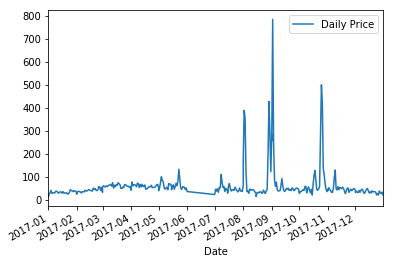

In [47]:
#Read the pickle
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pylab as plt
    

pricing_upd_df = pd.read_pickle("SJ.pkl")

pricing_upd_df=pricing_upd_df.rename(index=str, columns={"Daily price": "Daily Price"})

pricing_upd_df.reset_index(inplace=True)


def convert_index_datetime(x):
    from datetime import datetime 
    x = str(x)
    y = x[:4]+'-'+x[4:6]+'-'+x[6:]
    z=datetime.strptime(y,'%Y-%m-%d')
    return z

pricing_upd_df['Date'] = pricing_upd_df['Date'].apply(convert_index_datetime)
pricing_upd_df['Year'] = [x.year for x in pricing_upd_df['Date']]

pricing_upd_df = pricing_upd_df[pricing_upd_df['Year']==2017]
pricing_upd_df.set_index('Date',inplace=True)
pricing_upd_df=pricing_upd_df.drop('Year',axis = 1)
pricing_upd_df = pricing_upd_df.dropna(how='any')

pricing_upd_df.plot()

Mean Squard Error: 0.054472663567956325


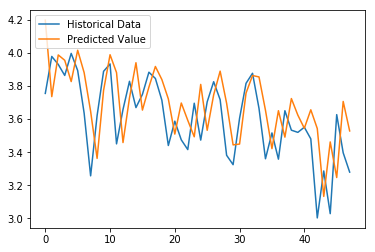

In [48]:
#Running the ARIMA

predictions = list()
history = list()


def rolling_predictions(x):
    import warnings
    warnings.filterwarnings('ignore')
    from sklearn.metrics import mean_squared_error
    price_df_train = x.head(300)
    price_df_test = x.tail(-300)
    for i in range(len(price_df_test)):
        if i == (len(price_df_test)-2):
            break
        model = ARIMA(x.head(300 + i),order = (5,0,2))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        predicted_value = output[0]
        predictions.append(predicted_value)
        actual_value=price_df_test.iloc[i]
        history.append(actual_value)
        #print("Predicted value {} Actual value {}".format(predicted_value,actual_value))
    error = mean_squared_error(history,predictions)
    print("Mean Squard Error:",error)
    plt.plot(history,label = "Historical Data")
    plt.plot(predictions,label = "Predicted Value")
    plt.legend(loc ='upper left')
    plt.show()

#temp = price_df["106THSO_LNODED1"]
#San Diego,Fresno

#len(temp)
log_pricing = np.log(pricing_upd_df)
rolling_predictions(log_pricing)


[48. 47. 52. 54. 45. 42. 61. 56. 57. 50. 46. 49. 51. 53. 58. 60. 63. 55.
 59. 62. 67. 64. 65. 66. 72. 75. 77. 69. 68. 71. 73. 74. 70. 76. 87. 81.
 82. 79. 78. 89. 91. 88. 80. 84.]


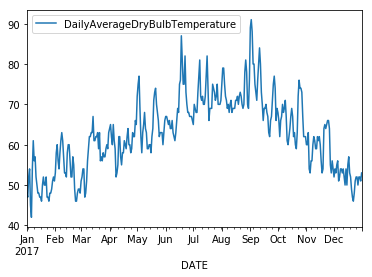

In [49]:
#Read the temperature data
exogenous_data = pd.read_csv('SanJose.csv')
#extracting Daily Average Temperature

exogenous_data = exogenous_data[['DATE','REPORT_TYPE','DailyAverageDryBulbTemperature']]
exogenous_data = exogenous_data[exogenous_data['REPORT_TYPE']=='SOD  '] #Dropping intra day temp
#Dropping irrelevant rows
exogenous_data=exogenous_data.drop('REPORT_TYPE',axis=1)

#Converting to correct time format

def convert_exogenous_datetime(x):
    from datetime import datetime 
    z=datetime.strptime(x[:10],'%Y-%m-%d')
    return z

exogenous_data['DATE']=exogenous_data['DATE'].apply(convert_exogenous_datetime)
exogenous_data.set_index('DATE',inplace=True)

exogenous_data.reset_index(inplace=True)
print(exogenous_data['DailyAverageDryBulbTemperature'].unique())

def convert_temp(x):
    try:
        y=int(x)
    except:
        y=np.nan
    return y

exogenous_data['DailyAverageDryBulbTemperature']=exogenous_data['DailyAverageDryBulbTemperature'].apply(convert_temp)
exogenous_data=exogenous_data.dropna(how='any')
exogenous_data = (exogenous_data.groupby('DATE').agg('mean'))
exogenous_data.plot()

In [50]:
pricing_upd_df['Daily Price'].corr(exogenous_data['DailyAverageDryBulbTemperature'])

0.3940474377986184

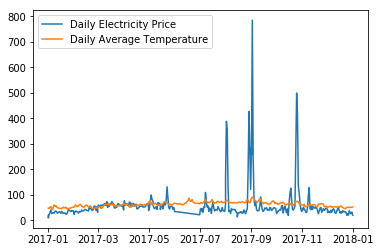

In [51]:
plt.plot(pricing_upd_df['Daily Price'],label='Daily Electricity Price')
plt.plot(exogenous_data['DailyAverageDryBulbTemperature'],label='Daily Average Temperature')
plt.legend(loc='upper left')
plt.show()

In [52]:
exogenous_data.reset_index(inplace=True)

In [53]:
exogenous_data = (exogenous_data.groupby('DATE').agg('mean'))

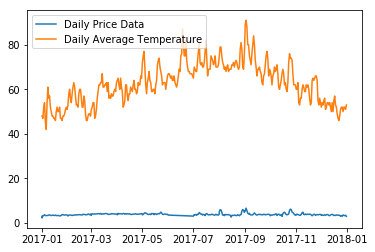

In [54]:
log_pricing = pricing_upd_df['Daily Price']
log_pricing = np.log(log_pricing)

plt.plot(log_pricing,label='Daily Price Data')
plt.plot(exogenous_data['DailyAverageDryBulbTemperature'],label='Daily Average Temperature')
plt.legend(loc='upper left')
plt.show()

In [55]:
print(len(log_pricing.dropna(how='any')))
print(len(exogenous_data.dropna(how='any')))
print(exogenous_data.tail(10))
print(log_pricing.tail(10))
log_pricing = pd.DataFrame(log_pricing)

350
365
            DailyAverageDryBulbTemperature
DATE                                      
2017-12-22                              46
2017-12-23                              48
2017-12-24                              51
2017-12-25                              52
2017-12-26                              52
2017-12-27                              50
2017-12-28                              52
2017-12-29                              52
2017-12-30                              51
2017-12-31                              53
Date
2017-12-22    3.551012
2017-12-23    3.480503
2017-12-24    3.001974
2017-12-25    3.286262
2017-12-26    3.027753
2017-12-27    3.627210
2017-12-28    3.396271
2017-12-29    3.279266
2017-12-30    3.490992
2017-12-31    3.009182
Name: Daily Price, dtype: float64


In [56]:
log_pricing.reset_index(inplace=True)
exogenous_data.reset_index(inplace=True)
exogenous_data=exogenous_data.rename(columns={'DATE':'Date'})
final_df = pd.merge(log_pricing,exogenous_data,how='inner',on=['Date'])
final_df.set_index('Date',inplace=True)


Mean Squared Error: 0.06164746873495014


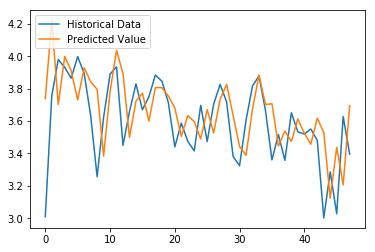

In [57]:
predictions = list()
history = list()

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

def rolling_predictions_exogenous(x):
    import statsmodels.api as sm
    train = x.head(300)
    test = x.tail(-300)
    for i in range(len(test)):
        if i == (len(test)-2):
            break
        model = sm.tsa.ARIMA(endog=x['Daily Price'].head(300 + i),exog=x['DailyAverageDryBulbTemperature'].head(300+i),order = (5,0,2))
        model_fit = model.fit()
        output = model_fit.predict()[-1]
        predicted_value = output
        predictions.append(predicted_value)
        actual_value=test['Daily Price'].iloc[i-1]
        history.append(actual_value)
        #print("Predicted value {} Actual value {}".format(predicted_value,actual_value))
    error = mean_squared_error(history,predictions)
    print("Mean Squared Error:",error)
    plt.plot(history,label = "Historical Data")
    plt.plot(predictions,label = "Predicted Value")
    plt.legend(loc ='upper left')
    plt.show()

rolling_predictions_exogenous(final_df.dropna(how='any'))

In [ ]:
la = pd.read_pickle("LA.pkl")

In [ ]:
sf = pd.read_pickle("SF.pkl")

In [ ]:
print(la.head(10))
print(sf.head(10))


In [ ]:
len(final_df)